In [1]:
import pymmcore 
import os
eclipse_cfg_path: str = r"C:\Users\Luke\Desktop\Barracuda\AutomatedCE\config\NikonEclipseTi.cfg"

In [2]:
import matplotlib.pyplot as plt

In [3]:

mm_dir = "C:\Program Files\Micro-Manager-2.0chipimaging" # note, I installed a new micromanager, old suffix was 'gamma'
device_config_file_name = "MMConfig_demo.cfg" # this demo file has a bunch of 'mock' devices
device_cfg_path = os.path.join(mm_dir, device_config_file_name)

In [4]:
mmc = pymmcore.CMMCore()
mmc.setDeviceAdapterSearchPaths([mm_dir])
mmc.loadSystemConfiguration(eclipse_cfg_path)

In [5]:
mmc.getXYPosition()

[34851.7005193308, -26624.500396735966]

### taking images
- set auto shutter to False
- set shutter open to False
- snapImage


very big note: matplotlib normalizes the image so that the highest value is the white color. This means matplotlib imshow images aren't representative of what's actually being seen on the camera. In reality, a pixel of value 65535 (2^16 - 1) is white. It is important to adjust for this in the actual system. 

However, normalizing like this is actually pretty useful. If we use the raw values, the light bleeds too much before the image gets bright and we can't see anything. This is why I originally introduce the gain feature in the other system's camera. That may be a useful function to have here as well 

In [6]:
mmc.setAutoShutter(False)

In [7]:
mmc.setShutterOpen(False)

In [8]:
def take_image():
    mmc.snapImage()
    im = mmc.getImage()
    plt.imshow(im, cmap='gray')

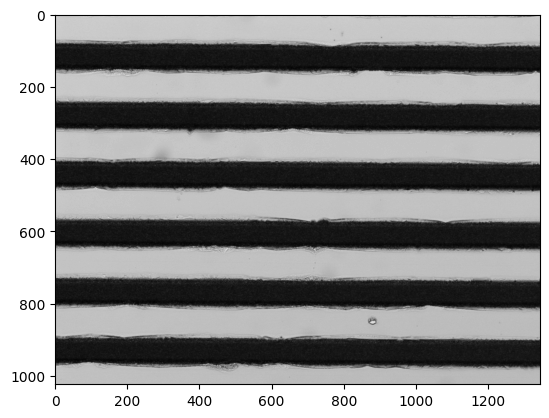

In [12]:
take_image()

In [10]:
mmc.getXYPosition()

[34851.7005193308, -26624.500396735966]

In [11]:
mmc.setXYPosition(35800.0, -28062.7)

In [20]:
from PIL import Image
def save_snapshot(image_name):
    save_path = os.path.join(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\prototyping\sample_data", image_name)

    mmc.snapImage()
    im = mmc.getImage()
    pilim = Image.fromarray(im)
    pilim.save(save_path)
    # gray = pilim.convert(mode="L")
    # gray.save(save_path)

In [42]:
save_snapshot("im2.TIFF") # note that this is dark rn because of no gain. This is what the image actually looks like though

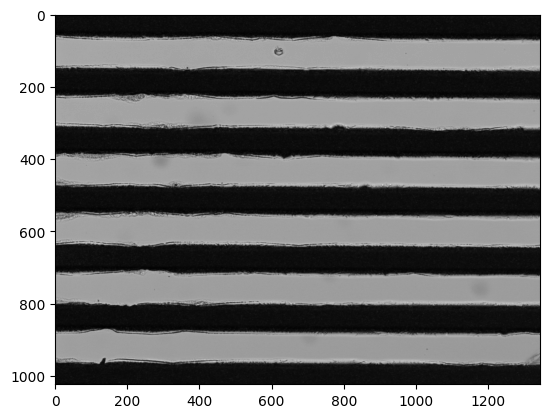

In [43]:
take_image()

In [13]:
mmc.getXYPosition()

[35800.00053346157, -28062.600418165326]

In [14]:
mmc.setXYPosition(36900.30, -28963.50)

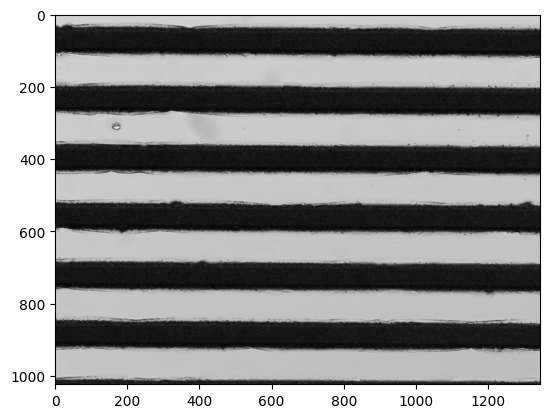

In [15]:
take_image()

In [72]:
save_snapshot("im7.TIFF")

In [73]:
mmc.reset()